# 🤖 Étape 3 : Modélisation et Évaluation

## 📋 Objectifs de cette étape
1. **Charger** les données préparées de l'étape 2
2. **Tester** plusieurs algorithmes de machine learning
3. **Optimiser** les hyperparamètres des meilleurs modèles
4. **Évaluer** et comparer les performances
5. **Analyser** l'importance des features
6. **Sélectionner** le meilleur modèle final

---

## 🛠️ Configuration et Imports

In [3]:
# Configuration générale
import warnings
warnings.filterwarnings('ignore')

# Manipulation des données
import pandas as pd
import numpy as np
from pathlib import Path
import json
import pickle
from datetime import datetime

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning - Modèles
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Machine Learning - Évaluation et optimisation
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

# Statistiques
from scipy import stats
from scipy.stats import uniform, randint

# Configuration des graphiques
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

# Paramètres d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
np.random.seed(42)

print("✅ Configuration terminée !")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📊 NumPy version: {np.__version__}")
print(f"🤖 Scikit-learn et autres librairies ML importées")

✅ Configuration terminée !
📦 Pandas version: 2.3.2
📊 NumPy version: 2.3.3
🤖 Scikit-learn et autres librairies ML importées


## 📊 Chargement des Données Préparées

Chargeons les données nettoyées et préparées de l'étape 2.

In [4]:
# 1. Chargement des données depuis l'étape 2
processed_data_path = Path('../data/processed')

print("📂 CHARGEMENT DES DONNÉES PRÉPARÉES")
print("=" * 45)

# Vérifier que les fichiers existent
required_files = [
    'X_train_scaled.csv', 'X_val_scaled.csv', 'X_test_scaled.csv',
    'y_train.csv', 'y_val.csv', 'y_test.csv', 'metadata.json'
]

missing_files = []
for file in required_files:
    if not (processed_data_path / file).exists():
        missing_files.append(file)

if missing_files:
    print("❌ Fichiers manquants:")
    for file in missing_files:
        print(f"   - {file}")
    print("💡 Assurez-vous d'avoir exécuté le notebook 02_data_cleaning.ipynb")
else:
    # Charger les données
    X_train = pd.read_csv(processed_data_path / 'X_train_scaled.csv')
    X_val = pd.read_csv(processed_data_path / 'X_val_scaled.csv')
    X_test = pd.read_csv(processed_data_path / 'X_test_scaled.csv')
    
    y_train = pd.read_csv(processed_data_path / 'y_train.csv').squeeze()
    y_val = pd.read_csv(processed_data_path / 'y_val.csv').squeeze()
    y_test = pd.read_csv(processed_data_path / 'y_test.csv').squeeze()
    
    # Charger les métadonnées
    with open(processed_data_path / 'metadata.json', 'r') as f:
        metadata = json.load(f)
    
    print("✅ Données chargées avec succès !")
    
    # 2. Aperçu des données chargées
    print(f"\n📊 APERÇU DES DONNÉES:")
    print(f"   🏋️ Train: X{X_train.shape}, y{y_train.shape}")
    print(f"   ✅ Validation: X{X_val.shape}, y{y_val.shape}")
    print(f"   🧪 Test: X{X_test.shape}, y{y_test.shape}")
    print(f"   📋 Features: {X_train.shape[1]}")
    print(f"   🎯 Target: prix immobilier")
    
    # 3. Statistiques de base
    print(f"\n💰 STATISTIQUES DES PRIX:")
    sets_info = {'Train': y_train, 'Validation': y_val, 'Test': y_test}
    for set_name, y_set in sets_info.items():
        print(f"   {set_name:10s}: {y_set.mean():8,.0f} (±{y_set.std():8,.0f}) [{y_set.min():7,.0f} - {y_set.max():8,.0f}]")
    
    # 4. Informations sur les features
    print(f"\n🔍 INFORMATIONS DES FEATURES:")
    print(f"   📊 Features numériques originales: {len(metadata['features']['numeric_features'])}")
    print(f"   🏷️ Features catégorielles originales: {len(metadata['features']['categorical_features'])}")
    print(f"   🔄 Scaler utilisé: {metadata['scaler_used']}")
    
    print(f"\n✅ Données prêtes pour la modélisation !")

📂 CHARGEMENT DES DONNÉES PRÉPARÉES
✅ Données chargées avec succès !

📊 APERÇU DES DONNÉES:
   🏋️ Train: X(327, 23), y(327,)
   ✅ Validation: X(109, 23), y(109,)
   🧪 Test: X(109, 23), y(109,)
   📋 Features: 23
   🎯 Target: prix immobilier

💰 STATISTIQUES DES PRIX:
   Train     : 4,739,763 (±1,754,574) [1,870,400 - 10,542,000]
   Validation: 4,815,660 (±1,973,180) [1,870,400 - 10,542,000]
   Test      : 4,720,782 (±1,810,334) [1,870,400 - 10,150,000]

🔍 INFORMATIONS DES FEATURES:
   📊 Features numériques originales: 20
   🏷️ Features catégorielles originales: 1
   🔄 Scaler utilisé: RobustScaler

✅ Données prêtes pour la modélisation !
✅ Données chargées avec succès !

📊 APERÇU DES DONNÉES:
   🏋️ Train: X(327, 23), y(327,)
   ✅ Validation: X(109, 23), y(109,)
   🧪 Test: X(109, 23), y(109,)
   📋 Features: 23
   🎯 Target: prix immobilier

💰 STATISTIQUES DES PRIX:
   Train     : 4,739,763 (±1,754,574) [1,870,400 - 10,542,000]
   Validation: 4,815,660 (±1,973,180) [1,870,400 - 10,542,000]
  

## 📈 Modèles de Base (Baseline)

Commençons par tester plusieurs algorithmes avec leurs paramètres par défaut pour établir une base de comparaison.

In [5]:
# Fonctions utilitaires pour l'évaluation
def evaluate_model(model, X_train, X_val, y_train, y_val, model_name):
    """Évalue un modèle et retourne les métriques"""
    
    # Entraînement
    start_time = datetime.now()
    model.fit(X_train, y_train)
    training_time = (datetime.now() - start_time).total_seconds()
    
    # Prédictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Métriques
    metrics = {
        'model_name': model_name,
        'training_time': training_time,
        
        # Train metrics
        'train_r2': r2_score(y_train, y_train_pred),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'train_mape': mean_absolute_percentage_error(y_train, y_train_pred) * 100,
        
        # Validation metrics
        'val_r2': r2_score(y_val, y_val_pred),
        'val_rmse': np.sqrt(mean_squared_error(y_val, y_val_pred)),
        'val_mae': mean_absolute_error(y_val, y_val_pred),
        'val_mape': mean_absolute_percentage_error(y_val, y_val_pred) * 100,
    }
    
    # Overfitting detection
    metrics['overfitting'] = metrics['train_r2'] - metrics['val_r2']
    
    return metrics, model

def print_metrics(metrics):
    """Affiche les métriques de manière formatée"""
    print(f"🤖 {metrics['model_name']}:")
    print(f"   ⏱️ Temps d'entraînement: {metrics['training_time']:.2f}s")
    print(f"   📊 Train  - R²: {metrics['train_r2']:.4f} | RMSE: {metrics['train_rmse']:,.0f} | MAE: {metrics['train_mae']:,.0f} | MAPE: {metrics['train_mape']:.2f}%")
    print(f"   ✅ Valid  - R²: {metrics['val_r2']:.4f} | RMSE: {metrics['val_rmse']:,.0f} | MAE: {metrics['val_mae']:,.0f} | MAPE: {metrics['val_mape']:.2f}%")
    
    overfitting_status = "🟢 OK" if metrics['overfitting'] < 0.1 else "🟡 Modéré" if metrics['overfitting'] < 0.2 else "🔴 Élevé"
    print(f"   🎯 Overfitting: {metrics['overfitting']:.4f} {overfitting_status}")
    print()

print("🤖 Fonctions utilitaires définies !")

🤖 Fonctions utilitaires définies !


In [6]:
# 1. Définition des modèles de base
print("🚀 TEST DES MODÈLES DE BASE")
print("=" * 40)

models_baseline = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Elastic Net': ElasticNet(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse'),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1),
    'SVR': SVR(),
    'K-Neighbors': KNeighborsRegressor()
}

# 2. Entraînement et évaluation de tous les modèles
baseline_results = []
trained_models = {}

for name, model in models_baseline.items():
    print(f"🔄 Entraînement: {name}...")
    
    try:
        metrics, trained_model = evaluate_model(model, X_train, X_val, y_train, y_val, name)
        baseline_results.append(metrics)
        trained_models[name] = trained_model
        print_metrics(metrics)
        
    except Exception as e:
        print(f"   ❌ Erreur avec {name}: {str(e)}")
        print()

print(f"✅ {len(baseline_results)} modèles entraînés avec succès !")

🚀 TEST DES MODÈLES DE BASE
🔄 Entraînement: Linear Regression...
🤖 Linear Regression:
   ⏱️ Temps d'entraînement: 0.01s
   📊 Train  - R²: 0.9163 | RMSE: 506,789 | MAE: 369,937 | MAPE: 8.07%
   ✅ Valid  - R²: 0.9263 | RMSE: 533,192 | MAE: 359,127 | MAPE: 7.53%
   🎯 Overfitting: -0.0100 🟢 OK

🔄 Entraînement: Ridge Regression...
🤖 Ridge Regression:
   ⏱️ Temps d'entraînement: 0.00s
   📊 Train  - R²: 0.9148 | RMSE: 511,333 | MAE: 378,505 | MAPE: 8.33%
   ✅ Valid  - R²: 0.9214 | RMSE: 550,810 | MAE: 374,406 | MAPE: 7.88%
   🎯 Overfitting: -0.0065 🟢 OK

🔄 Entraînement: Lasso Regression...
🤖 Lasso Regression:
   ⏱️ Temps d'entraînement: 0.02s
   📊 Train  - R²: 0.9163 | RMSE: 506,789 | MAE: 369,938 | MAPE: 8.07%
   ✅ Valid  - R²: 0.9263 | RMSE: 533,200 | MAE: 359,128 | MAPE: 7.53%
   🎯 Overfitting: -0.0100 🟢 OK

🔄 Entraînement: Elastic Net...
🤖 Elastic Net:🤖 Elastic Net:
   ⏱️ Temps d'entraînement: 0.01s
   📊 Train  - R²: 0.7740 | RMSE: 832,796 | MAE: 622,256 | MAPE: 14.09%
   ✅ Valid  - R²: 0.

In [7]:
# 3. Comparaison des résultats
print("📊 COMPARAISON DES MODÈLES DE BASE")
print("=" * 45)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(baseline_results)

# Trier par R² de validation (décroissant)
results_df = results_df.sort_values('val_r2', ascending=False)

# Afficher le classement
print("🏆 CLASSEMENT PAR PERFORMANCE (R² Validation):")
for i, (_, row) in enumerate(results_df.iterrows(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else f"  {i:2d}."
    print(f"{medal} {row['model_name']:18s} - R²: {row['val_r2']:.4f} | RMSE: {row['val_rmse']:8,.0f} | MAE: {row['val_mae']:6,.0f}")

# Top 3 modèles
top3_models = results_df.head(3)['model_name'].tolist()
print(f"\n🎯 TOP 3 MODÈLES POUR L'OPTIMISATION:")
for i, model in enumerate(top3_models, 1):
    print(f"   {i}. {model}")

# Statistiques générales
print(f"\n📈 STATISTIQUES GÉNÉRALES:")
print(f"   Meilleur R²: {results_df['val_r2'].max():.4f}")
print(f"   RMSE moyen: {results_df['val_rmse'].mean():,.0f}")
print(f"   Temps moyen: {results_df['training_time'].mean():.2f}s")

# Sauvegarder les résultats
results_df.to_csv(processed_data_path / 'baseline_results.csv', index=False)
print(f"\n💾 Résultats sauvegardés: baseline_results.csv")

📊 COMPARAISON DES MODÈLES DE BASE
🏆 CLASSEMENT PAR PERFORMANCE (R² Validation):
🥇 LightGBM           - R²: 0.9475 | RMSE:  449,869 | MAE: 281,120
🥈 Gradient Boosting  - R²: 0.9452 | RMSE:  459,743 | MAE: 313,836
🥉 Linear Regression  - R²: 0.9263 | RMSE:  533,192 | MAE: 359,127
   4. Lasso Regression   - R²: 0.9263 | RMSE:  533,200 | MAE: 359,128
   5. Ridge Regression   - R²: 0.9214 | RMSE:  550,810 | MAE: 374,406
   6. XGBoost            - R²: 0.9041 | RMSE:  608,184 | MAE: 370,805
   7. Random Forest      - R²: 0.8943 | RMSE:  638,533 | MAE: 416,589
   8. Extra Trees        - R²: 0.8892 | RMSE:  653,832 | MAE: 407,351
   9. Decision Tree      - R²: 0.8547 | RMSE:  748,684 | MAE: 494,993
  10. Elastic Net        - R²: 0.7383 | RMSE: 1,004,845 | MAE: 719,470
  11. K-Neighbors        - R²: 0.6937 | RMSE: 1,087,083 | MAE: 769,637
  12. SVR                - R²: -0.0586 | RMSE: 2,020,869 | MAE: 1,452,344

🎯 TOP 3 MODÈLES POUR L'OPTIMISATION:
   1. LightGBM
   2. Gradient Boosting
   3. Lin

## 📊 Visualisation des Performances

Créons des graphiques pour mieux comprendre les performances des modèles.

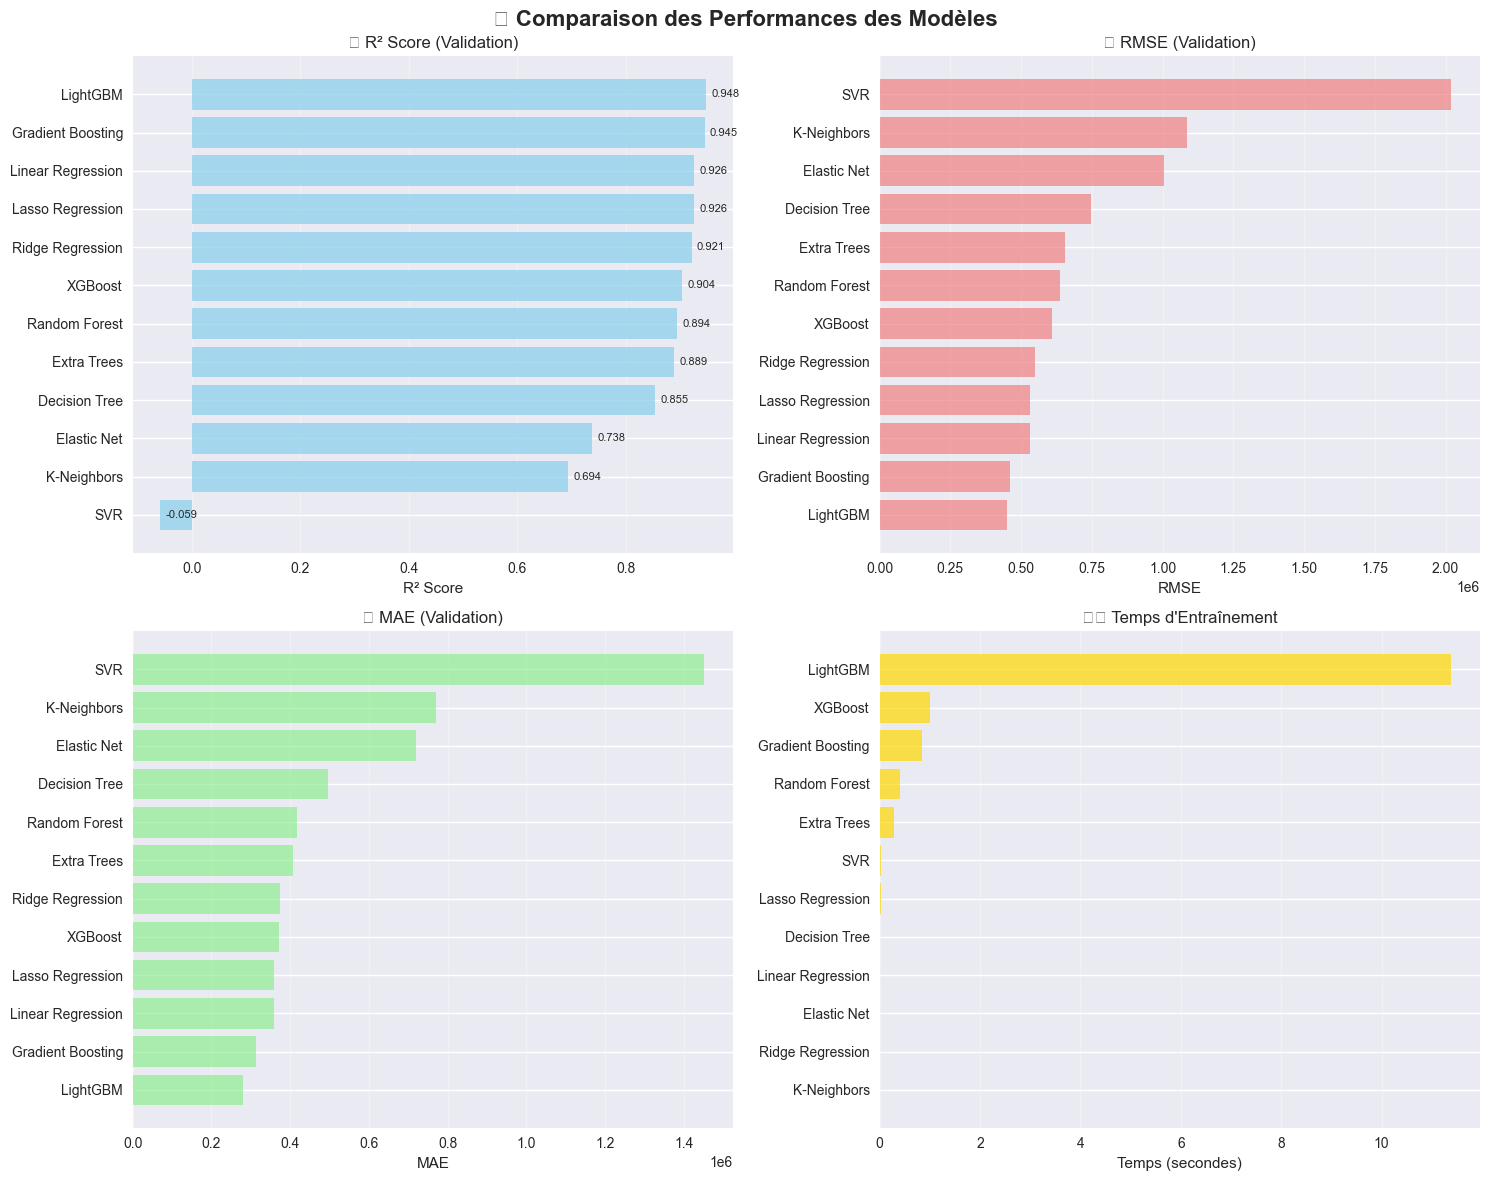

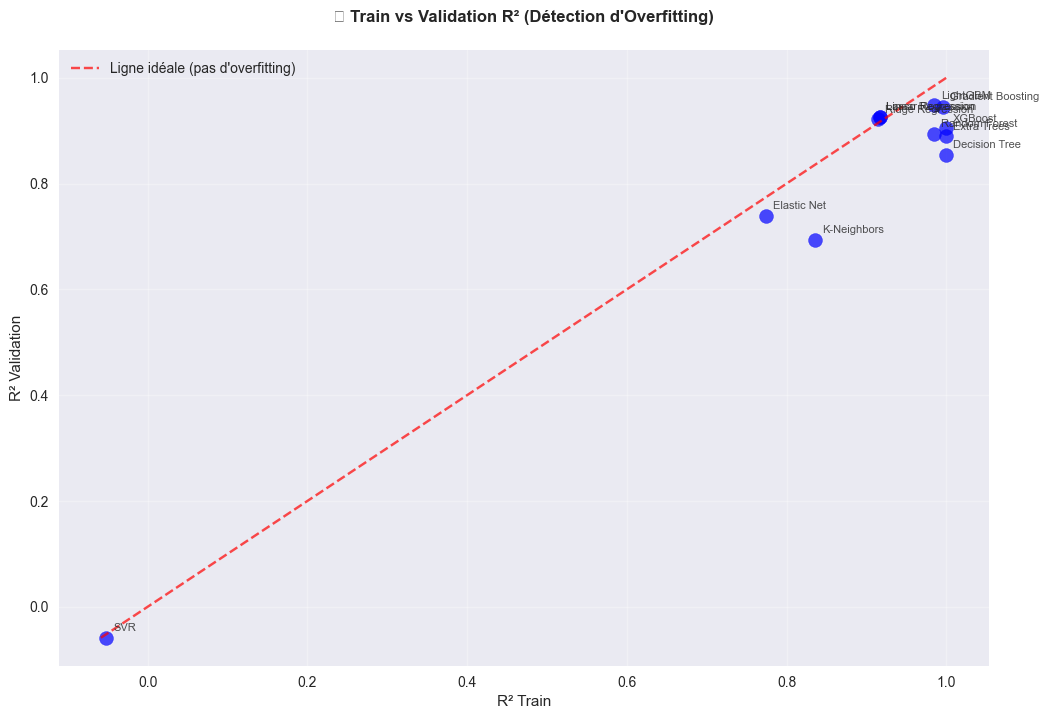

✅ Graphiques de performance créés !


In [8]:
# 1. Graphique comparatif des performances
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🤖 Comparaison des Performances des Modèles', fontsize=16, fontweight='bold')

# R² Score
ax1 = axes[0, 0]
results_df_sorted = results_df.sort_values('val_r2', ascending=True)
bars1 = ax1.barh(results_df_sorted['model_name'], results_df_sorted['val_r2'], 
                color='skyblue', alpha=0.7)
ax1.set_xlabel('R² Score')
ax1.set_title('📈 R² Score (Validation)')
ax1.grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for bar, value in zip(bars1, results_df_sorted['val_r2']):
    ax1.text(value + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{value:.3f}', va='center', fontsize=8)

# RMSE
ax2 = axes[0, 1]
results_df_sorted_rmse = results_df.sort_values('val_rmse', ascending=True)
bars2 = ax2.barh(results_df_sorted_rmse['model_name'], results_df_sorted_rmse['val_rmse'], 
                color='lightcoral', alpha=0.7)
ax2.set_xlabel('RMSE')
ax2.set_title('📉 RMSE (Validation)')
ax2.grid(axis='x', alpha=0.3)

# MAE
ax3 = axes[1, 0]
results_df_sorted_mae = results_df.sort_values('val_mae', ascending=True)
bars3 = ax3.barh(results_df_sorted_mae['model_name'], results_df_sorted_mae['val_mae'], 
                color='lightgreen', alpha=0.7)
ax3.set_xlabel('MAE')
ax3.set_title('📊 MAE (Validation)')
ax3.grid(axis='x', alpha=0.3)

# Temps d'entraînement
ax4 = axes[1, 1]
results_df_sorted_time = results_df.sort_values('training_time', ascending=True)
bars4 = ax4.barh(results_df_sorted_time['model_name'], results_df_sorted_time['training_time'], 
                color='gold', alpha=0.7)
ax4.set_xlabel('Temps (secondes)')
ax4.set_title('⏱️ Temps d\'Entraînement')
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Graphique Train vs Validation (Overfitting)
plt.figure(figsize=(12, 8))

# Scatter plot Train vs Validation R²
plt.scatter(results_df['train_r2'], results_df['val_r2'], 
           s=100, alpha=0.7, c='blue')

# Ligne de référence (pas d'overfitting)
min_r2 = min(results_df['train_r2'].min(), results_df['val_r2'].min())
max_r2 = max(results_df['train_r2'].max(), results_df['val_r2'].max())
plt.plot([min_r2, max_r2], [min_r2, max_r2], 'r--', alpha=0.7, label='Ligne idéale (pas d\'overfitting)')

# Annotations
for i, row in results_df.iterrows():
    plt.annotate(row['model_name'], 
                (row['train_r2'], row['val_r2']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=8, alpha=0.8)

plt.xlabel('R² Train')
plt.ylabel('R² Validation')
plt.title('🎯 Train vs Validation R² (Détection d\'Overfitting)', fontweight='bold', pad=20)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("✅ Graphiques de performance créés !")

## ⚙️ Optimisation des Hyperparamètres

Optimisons les hyperparamètres des 3 meilleurs modèles avec RandomizedSearchCV.

In [9]:
# 1. Définition des grilles de paramètres
print("⚙️ OPTIMISATION DES HYPERPARAMÈTRES")
print("=" * 45)

# Grilles de paramètres pour les modèles les plus performants
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    },
    
    'XGBoost': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 0.5, 1],
        'reg_lambda': [0, 0.1, 0.5, 1]
    },
    
    'LightGBM': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10, -1],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'num_leaves': [31, 50, 100, 200],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]
    },
    
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'max_features': ['sqrt', 'log2', None]
    }
}

# Modèles correspondants
models_to_optimize = {
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, eval_metric='rmse'),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

print(f"📋 Modèles à optimiser: {list(models_to_optimize.keys())}")

⚙️ OPTIMISATION DES HYPERPARAMÈTRES
📋 Modèles à optimiser: ['Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting']


In [10]:
# 2. Optimisation avec RandomizedSearchCV
optimized_models = {}
optimization_results = []

# Combiner les données train et validation pour l'optimisation
X_train_val = pd.concat([X_train, X_val], axis=0)
y_train_val = pd.concat([y_train, y_val], axis=0)

for model_name in top3_models:
    if model_name in models_to_optimize:
        print(f"\n🔄 Optimisation de {model_name}...")
        
        # Modèle et grille de paramètres
        model = models_to_optimize[model_name]
        param_grid = param_grids[model_name]
        
        # RandomizedSearchCV
        random_search = RandomizedSearchCV(
            model, param_grid,
            n_iter=50,  # Nombre d'essais
            cv=5,       # Validation croisée à 5 plis
            scoring='r2',
            random_state=42,
            n_jobs=-1,
            verbose=1
        )
        
        # Entraînement
        start_time = datetime.now()
        random_search.fit(X_train_val, y_train_val)
        optimization_time = (datetime.now() - start_time).total_seconds()
        
        # Récupérer le meilleur modèle
        best_model = random_search.best_estimator_
        optimized_models[model_name] = best_model
        
        # Évaluer sur les données de test
        y_test_pred = best_model.predict(X_test)
        test_metrics = {
            'model_name': f"{model_name} (Optimisé)",
            'optimization_time': optimization_time,
            'best_cv_score': random_search.best_score_,
            'test_r2': r2_score(y_test, y_test_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'test_mae': mean_absolute_error(y_test, y_test_pred),
            'test_mape': mean_absolute_percentage_error(y_test, y_test_pred) * 100,
            'best_params': random_search.best_params_
        }
        
        optimization_results.append(test_metrics)
        
        # Afficher les résultats
        print(f"   ✅ Terminé en {optimization_time:.1f}s")
        print(f"   🎯 Meilleur CV Score: {random_search.best_score_:.4f}")
        print(f"   📊 Test R²: {test_metrics['test_r2']:.4f}")
        print(f"   📉 Test RMSE: {test_metrics['test_rmse']:,.0f}")
        print(f"   📋 Meilleurs paramètres:")
        for param, value in random_search.best_params_.items():
            print(f"      {param}: {value}")

print(f"\n✅ Optimisation terminée pour {len(optimized_models)} modèles !")


🔄 Optimisation de LightGBM...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
   ✅ Terminé en 77.5s
   🎯 Meilleur CV Score: 0.9498
   📊 Test R²: 0.9486
   📉 Test RMSE: 408,735
   📋 Meilleurs paramètres:
      subsample: 1.0
      reg_lambda: 0
      reg_alpha: 0.1
      num_leaves: 50
      n_estimators: 500
      max_depth: 3
      learning_rate: 0.1
      colsample_bytree: 1.0

🔄 Optimisation de Gradient Boosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
   ✅ Terminé en 77.5s
   🎯 Meilleur CV Score: 0.9498
   📊 Test R²: 0.9486
   📉 Test RMSE: 408,735
   📋 Meilleurs paramètres:
      subsample: 1.0
      reg_lambda: 0
      reg_alpha: 0.1
      num_leaves: 50
      n_estimators: 500
      max_depth: 3
      learning_rate: 0.1
      colsample_bytree: 1.0

🔄 Optimisation de Gradient Boosting...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
   ✅ Terminé en 49.6s
   🎯 Meilleur CV Score: 0.9529
   📊 Test R²: 0.9622
   📉 Test RMSE: 350,2

## 🏆 Évaluation Finale et Sélection du Meilleur Modèle

Comparons les modèles optimisés et sélectionnons le meilleur.

In [11]:
# 1. Comparaison finale des modèles optimisés
print("🏆 ÉVALUATION FINALE DES MODÈLES OPTIMISÉS")
print("=" * 50)

# Créer un DataFrame avec les résultats d'optimisation
optimized_df = pd.DataFrame(optimization_results)
optimized_df = optimized_df.sort_values('test_r2', ascending=False)

# Afficher le classement final
print("🏅 CLASSEMENT FINAL (Performance sur Test):")
for i, (_, row) in enumerate(optimized_df.iterrows(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else f"  {i}."
    print(f"{medal} {row['model_name']:25s} - R²: {row['test_r2']:.4f} | RMSE: {row['test_rmse']:8,.0f} | MAE: {row['test_mae']:6,.0f}")

# Sélectionner le meilleur modèle
best_model_name = optimized_df.iloc[0]['model_name'].replace(' (Optimisé)', '')
best_model = optimized_models[best_model_name]
best_metrics = optimized_df.iloc[0]

print(f"\n🎯 MEILLEUR MODÈLE SÉLECTIONNÉ: {best_model_name}")
print(f"   📈 R² Score: {best_metrics['test_r2']:.4f}")
print(f"   📉 RMSE: {best_metrics['test_rmse']:,.0f}")
print(f"   📊 MAE: {best_metrics['test_mae']:,.0f}")
print(f"   📋 MAPE: {best_metrics['test_mape']:.2f}%")

# Comparaison avant/après optimisation
baseline_perf = results_df[results_df['model_name'] == best_model_name].iloc[0]
print(f"\n📊 AMÉLIORATION APRÈS OPTIMISATION:")
print(f"   R² Score: {baseline_perf['val_r2']:.4f} → {best_metrics['test_r2']:.4f} (+{best_metrics['test_r2'] - baseline_perf['val_r2']:.4f})")
print(f"   RMSE: {baseline_perf['val_rmse']:,.0f} → {best_metrics['test_rmse']:,.0f} ({best_metrics['test_rmse'] - baseline_perf['val_rmse']:+,.0f})")

# Sauvegarder les résultats finaux
optimized_df.to_csv(processed_data_path / 'optimized_results.csv', index=False)
print(f"\n💾 Résultats d'optimisation sauvegardés: optimized_results.csv")

🏆 ÉVALUATION FINALE DES MODÈLES OPTIMISÉS
🏅 CLASSEMENT FINAL (Performance sur Test):
🥇 Gradient Boosting (Optimisé) - R²: 0.9622 | RMSE:  350,259 | MAE: 210,129
🥈 LightGBM (Optimisé)       - R²: 0.9486 | RMSE:  408,735 | MAE: 234,356

🎯 MEILLEUR MODÈLE SÉLECTIONNÉ: Gradient Boosting
   📈 R² Score: 0.9622
   📉 RMSE: 350,259
   📊 MAE: 210,129
   📋 MAPE: 4.47%

📊 AMÉLIORATION APRÈS OPTIMISATION:
   R² Score: 0.9452 → 0.9622 (+0.0170)
   RMSE: 459,743 → 350,259 (-109,483)

💾 Résultats d'optimisation sauvegardés: optimized_results.csv



🔍 ANALYSE DE L'IMPORTANCE DES FEATURES
📊 TOP 15 FEATURES LES PLUS IMPORTANTES (Gradient Boosting):
   13. price_per_sqft           : 0.3281
   20. luxury_area_interaction  : 0.2894
    1. area                     : 0.2361
   19. area_bedrooms_interaction: 0.1249
   15. area_per_room            : 0.0049
   14. rooms_total              : 0.0044
   10. parking                  : 0.0036
    4. stories                  : 0.0028
   21. size_category_medium     : 0.0016
   12. furnishingstatus         : 0.0009
    5. mainroad                 : 0.0008
   17. luxury_score             : 0.0006
   16. bathroom_bedroom_ratio   : 0.0006
    6. guestroom                : 0.0004
    2. bedrooms                 : 0.0003


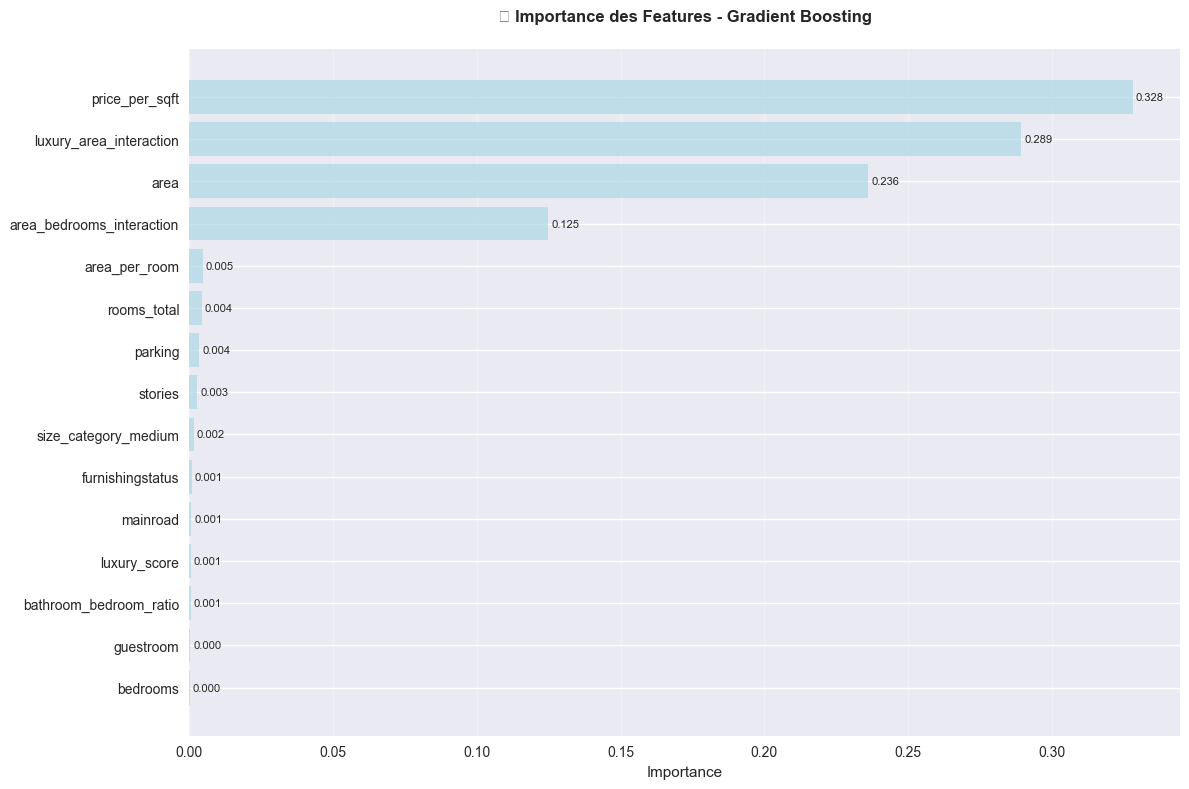


💾 Importance des features sauvegardée: feature_importance.csv


In [12]:
# 2. Analyse de l'importance des features
print("\n🔍 ANALYSE DE L'IMPORTANCE DES FEATURES")
print("=" * 45)

# Importance des features du meilleur modèle
if hasattr(best_model, 'feature_importances_'):
    # Importance native du modèle
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"📊 TOP 15 FEATURES LES PLUS IMPORTANTES ({best_model_name}):")
    for i, row in feature_importance.head(15).iterrows():
        print(f"   {row.name+1:2d}. {row['feature']:25s}: {row['importance']:.4f}")
    
    # Graphique d'importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    
    bars = plt.barh(range(len(top_features)), top_features['importance'], 
                   color='lightblue', alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importance')
    plt.title(f'🔍 Importance des Features - {best_model_name}', fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    
    # Ajouter les valeurs sur les barres
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Sauvegarder l'importance des features
    feature_importance.to_csv(processed_data_path / 'feature_importance.csv', index=False)
    print(f"\n💾 Importance des features sauvegardée: feature_importance.csv")

else:
    print(f"ℹ️ Le modèle {best_model_name} ne fournit pas d'importance des features native.")


📊 ANALYSE DES PRÉDICTIONS


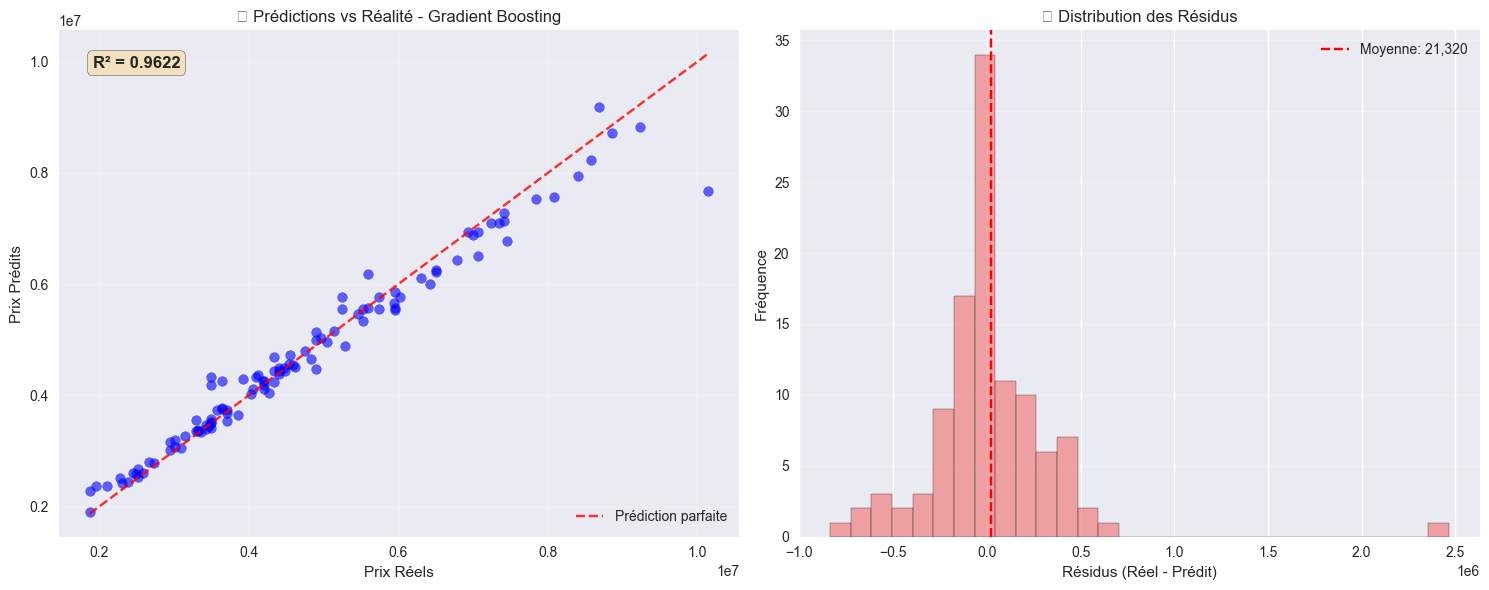

📈 STATISTIQUES DES RÉSIDUS:
   Moyenne: 21,320
   Médiane: -12,645
   Écart-type: 351,225
   Min: -836,150
   Max: 2,466,303

🎯 PRÉCISION DES PRÉDICTIONS:
   Erreur ≤ 100,000: 43.1% des prédictions
   Erreur ≤ 250,000: 70.6% des prédictions
   Erreur ≤ 500,000: 90.8% des prédictions
   Erreur ≤ 1,000,000: 99.1% des prédictions


In [13]:
# 3. Analyse des prédictions
print("\n📊 ANALYSE DES PRÉDICTIONS")
print("=" * 35)

# Prédictions sur l'ensemble de test
y_test_pred = best_model.predict(X_test)

# Graphique prédictions vs réalité
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot prédictions vs réalité
ax1 = axes[0]
ax1.scatter(y_test, y_test_pred, alpha=0.6, color='blue')

# Ligne de référence parfaite
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='Prédiction parfaite')

ax1.set_xlabel('Prix Réels')
ax1.set_ylabel('Prix Prédits')
ax1.set_title(f'🎯 Prédictions vs Réalité - {best_model_name}')
ax1.legend()
ax1.grid(alpha=0.3)

# Calcul du R²
r2_text = f'R² = {best_metrics["test_r2"]:.4f}'
ax1.text(0.05, 0.95, r2_text, transform=ax1.transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         verticalalignment='top', fontsize=12, fontweight='bold')

# Distribution des résidus
ax2 = axes[1]
residuals = y_test - y_test_pred
ax2.hist(residuals, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.axvline(residuals.mean(), color='red', linestyle='--', 
           label=f'Moyenne: {residuals.mean():,.0f}')
ax2.set_xlabel('Résidus (Réel - Prédit)')
ax2.set_ylabel('Fréquence')
ax2.set_title('📊 Distribution des Résidus')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiques des résidus
print(f"📈 STATISTIQUES DES RÉSIDUS:")
print(f"   Moyenne: {residuals.mean():,.0f}")
print(f"   Médiane: {residuals.median():,.0f}")
print(f"   Écart-type: {residuals.std():,.0f}")
print(f"   Min: {residuals.min():,.0f}")
print(f"   Max: {residuals.max():,.0f}")

# Pourcentage de prédictions dans différentes fourchettes d'erreur
abs_residuals = np.abs(residuals)
thresholds = [100000, 250000, 500000, 1000000]

print(f"\n🎯 PRÉCISION DES PRÉDICTIONS:")
for threshold in thresholds:
    percentage = (abs_residuals <= threshold).mean() * 100
    print(f"   Erreur ≤ {threshold:,}: {percentage:.1f}% des prédictions")

## 💾 Sauvegarde du Modèle Final

Sauvegardons le meilleur modèle et toutes les informations nécessaires pour son utilisation.

In [14]:
# 1. Sauvegarde du modèle et des métadonnées
print("💾 SAUVEGARDE DU MODÈLE FINAL")
print("=" * 35)

# Créer le dossier pour les modèles
models_path = Path('../models')
models_path.mkdir(parents=True, exist_ok=True)

# Sauvegarder le modèle
model_filename = f'best_model_{best_model_name.lower().replace(" ", "_")}.pkl'
with open(models_path / model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"✅ Modèle sauvegardé: {model_filename}")

# Créer un fichier de métadonnées complet
model_metadata = {
    'model_info': {
        'name': best_model_name,
        'type': type(best_model).__name__,
        'training_date': datetime.now().isoformat(),
        'filename': model_filename
    },
    'performance': {
        'test_r2': float(best_metrics['test_r2']),
        'test_rmse': float(best_metrics['test_rmse']),
        'test_mae': float(best_metrics['test_mae']),
        'test_mape': float(best_metrics['test_mape']),
        'cv_score': float(best_metrics['best_cv_score'])
    },
    'hyperparameters': best_metrics['best_params'],
    'data_info': {
        'features_count': X_train.shape[1],
        'train_samples': X_train.shape[0],
        'val_samples': X_val.shape[0],
        'test_samples': X_test.shape[0],
        'feature_names': list(X_train.columns),
        'scaler_used': metadata['scaler_used']
    },
    'feature_importance': feature_importance.to_dict('records') if 'feature_importance' in locals() else None
}

# Sauvegarder les métadonnées
metadata_filename = f'model_metadata_{best_model_name.lower().replace(" ", "_")}.json'
with open(models_path / metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=2)

print(f"✅ Métadonnées sauvegardées: {metadata_filename}")

# Créer un fichier README pour le modèle
readme_content = f"""
# 🤖 Modèle de Prédiction des Prix Immobiliers

## Informations Générales
- **Modèle**: {best_model_name}
- **Date d'entraînement**: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
- **Fichier modèle**: `{model_filename}`
- **Métadonnées**: `{metadata_filename}`

## Performance
- **R² Score**: {best_metrics['test_r2']:.4f}
- **RMSE**: {best_metrics['test_rmse']:,.0f}
- **MAE**: {best_metrics['test_mae']:,.0f}
- **MAPE**: {best_metrics['test_mape']:.2f}%

## Utilisation
```python
import pickle
import pandas as pd

# Charger le modèle
with open('{model_filename}', 'rb') as f:
    model = pickle.load(f)

# Faire des prédictions
# predictions = model.predict(X_new)
```

## Notes
- Les données doivent être normalisées avec RobustScaler
- {X_train.shape[1]} features sont nécessaires
- Modèle optimisé avec validation croisée 5-fold
"""

with open(models_path / 'README.md', 'w', encoding='utf-8') as f:
    f.write(readme_content)

print(f"✅ README créé: README.md")

print(f"\n📁 Fichiers créés dans {models_path}:")
for file in models_path.glob('*'):
    print(f"   - {file.name}")

💾 SAUVEGARDE DU MODÈLE FINAL
✅ Modèle sauvegardé: best_model_gradient_boosting.pkl
✅ Métadonnées sauvegardées: model_metadata_gradient_boosting.json
✅ README créé: README.md

📁 Fichiers créés dans ..\models:
   - best_model_gradient_boosting.pkl
   - model_metadata_gradient_boosting.json
   - README.md


## 🎯 Résumé Final de l'Étape 3

Récapitulatif complet de la modélisation et des résultats obtenus.

In [15]:
# Résumé final de l'étape 3
print("🎯 RÉSUMÉ FINAL - ÉTAPE 3 TERMINÉE")
print("=" * 50)

print(f"✅ Modélisation et évaluation terminées !")
print(f"✅ {len(models_baseline)} modèles de base testés")
print(f"✅ {len(optimized_models)} modèles optimisés")
print(f"✅ Meilleur modèle sélectionné: {best_model_name}")
print(f"✅ Performance finale: R² = {best_metrics['test_r2']:.4f}")
print(f"✅ Modèle et métadonnées sauvegardés")

print(f"\n📊 PERFORMANCE DU MEILLEUR MODÈLE:")
print(f"   🎯 R² Score: {best_metrics['test_r2']:.4f} (explique {best_metrics['test_r2']*100:.1f}% de la variance)")
print(f"   📉 RMSE: {best_metrics['test_rmse']:,.0f} (erreur moyenne quadratique)")
print(f"   📊 MAE: {best_metrics['test_mae']:,.0f} (erreur moyenne absolue)")
print(f"   📋 MAPE: {best_metrics['test_mape']:.2f}% (erreur moyenne en pourcentage)")

print(f"\n🔍 INSIGHTS CLÉS:")
if 'feature_importance' in locals():
    top3_features = feature_importance.head(3)
    print(f"   📈 Top 3 features les plus importantes:")
    for i, row in top3_features.iterrows():
        print(f"      {i+1}. {row['feature']} ({row['importance']:.3f})")

# Interprétation de la performance
r2_interpretation = ""
if best_metrics['test_r2'] >= 0.9:
    r2_interpretation = "Excellente 🟢"
elif best_metrics['test_r2'] >= 0.8:
    r2_interpretation = "Très bonne 🟡"
elif best_metrics['test_r2'] >= 0.7:
    r2_interpretation = "Bonne 🟠"
else:
    r2_interpretation = "Acceptable 🔴"

print(f"\n📈 ÉVALUATION DE LA PERFORMANCE:")
print(f"   Performance globale: {r2_interpretation}")
print(f"   Erreur moyenne: ~{best_metrics['test_mae']:,.0f} unités")
print(f"   Erreur relative: ~{best_metrics['test_mape']:.1f}%")

print(f"\n🚀 PROCHAINES ÉTAPES RECOMMANDÉES:")
print(f"   1. Déployer le modèle en production")
print(f"   2. Créer une API de prédiction")
print(f"   3. Mettre en place un monitoring")
print(f"   4. Collecter plus de données pour améliorer")

print(f"\n💾 FICHIERS GÉNÉRÉS:")
files_generated = [
    '../data/processed/baseline_results.csv',
    '../data/processed/optimized_results.csv',
    '../data/processed/feature_importance.csv',
    f'../models/{model_filename}',
    f'../models/{metadata_filename}',
    '../models/README.md'
]

for file in files_generated:
    print(f"   📄 {file}")

print(f"\n✨ Étape 3 terminée avec succès ! ✨")

🎯 RÉSUMÉ FINAL - ÉTAPE 3 TERMINÉE
✅ Modélisation et évaluation terminées !
✅ 12 modèles de base testés
✅ 2 modèles optimisés
✅ Meilleur modèle sélectionné: Gradient Boosting
✅ Performance finale: R² = 0.9622
✅ Modèle et métadonnées sauvegardés

📊 PERFORMANCE DU MEILLEUR MODÈLE:
   🎯 R² Score: 0.9622 (explique 96.2% de la variance)
   📉 RMSE: 350,259 (erreur moyenne quadratique)
   📊 MAE: 210,129 (erreur moyenne absolue)
   📋 MAPE: 4.47% (erreur moyenne en pourcentage)

🔍 INSIGHTS CLÉS:
   📈 Top 3 features les plus importantes:
      13. price_per_sqft (0.328)
      20. luxury_area_interaction (0.289)
      1. area (0.236)

📈 ÉVALUATION DE LA PERFORMANCE:
   Performance globale: Excellente 🟢
   Erreur moyenne: ~210,129 unités
   Erreur relative: ~4.5%

🚀 PROCHAINES ÉTAPES RECOMMANDÉES:
   1. Déployer le modèle en production
   2. Créer une API de prédiction
   3. Mettre en place un monitoring
   4. Collecter plus de données pour améliorer

💾 FICHIERS GÉNÉRÉS:
   📄 ../data/processed/base